## How well do jobs and skills pay for Data Analysts?
#### Methology

1. Evaluate median salary for top 6 data jobs
2. Find median salary per skill for Data Analysts
3. Visualize for highest paying skills and most demanded skills

In [1]:
# import Libraries 
import pandas as pd
import matplotlib.pyplot as plt
import ast 
import numpy as np
from datasets import load_dataset
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills']  = df['job_skills'].apply(lambda x : ast.literal_eval(x) if pd.notna(x) else x) 

c:\Users\soods\anaconda3\envs\python_project_course\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Filter data to only include salary values from the United States.

In [2]:
df_us = df[df['job_country'] == "United States"].dropna(subset='salary_year_avg').copy() # ------------> dataframe contaning only us records
df_us.sample(5)

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
742523,Data Analyst,Data Analyst,"Newark, NJ",via Indeed,Full-time and Per diem,False,"New York, United States",2023-09-12 20:00:02,False,True,United States,year,86521.0,NaN,Rutgers University,"[sas, sas, r, go, word, excel, powerpoint, spss]","{'analyst_tools': ['sas', 'word', 'excel', 'po..."
494148,Data Scientist,"Data Scientist, Product Analytics","San Francisco, CA",via Ladders,Full-time,False,"California, United States",2023-07-07 11:04:56,False,True,United States,year,125000.0,NaN,Gametime,"[sql, python, r]","{'programming': ['sql', 'python', 'r']}"
529586,Data Engineer,Data Engineer,Anywhere,via ZipRecruiter,Full-time,True,"Texas, United States",2023-07-26 19:09:14,False,False,United States,year,115000.0,NaN,Genesis Capital,"[python, sql, sql server, postgresql, aws, red...","{'async': ['jira'], 'cloud': ['aws', 'redshift..."
233853,Data Analyst,Physical Scientist,"Tuscaloosa, AL",via ZipRecruiter,Full-time,False,"Florida, United States",2023-04-19 07:06:22,False,False,United States,year,82830.0,NaN,US Department of Commerce,None,None
395120,Data Analyst,Data Analyst,"Woodbridge Township, NJ",via Indeed,Full-time,False,"New York, United States",2023-05-26 17:59:54,True,True,United States,year,125000.0,NaN,Robert Half,"[go, flow]","{'other': ['flow'], 'programming': ['go']}"


Create a list of the top job_titles in the dataset and filter our dataframe to only contain these job titles.

In [3]:
job_titles = df_us['job_title_short'].value_counts().index[:6].tolist()
job_titles

['Data Scientist',
 'Data Analyst',
 'Data Engineer',
 'Senior Data Scientist',
 'Senior Data Engineer',
 'Senior Data Analyst']

In [4]:
df_us_top6 = df_us[df_us['job_title_short'].isin(job_titles)] #----------> Filtering only those rows which have any 1 of the 6 job titles in it
job_order  = df_us_top6.groupby('job_title_short')['salary_year_avg'].median().sort_values(ascending= False).index
job_order

Index(['Senior Data Scientist', 'Senior Data Engineer', 'Data Scientist',
       'Data Engineer', 'Senior Data Analyst', 'Data Analyst'],
      dtype='object', name='job_title_short')

## Plot Salary Distributions

Plot the top 6 job titles salary distributions using a box plot.

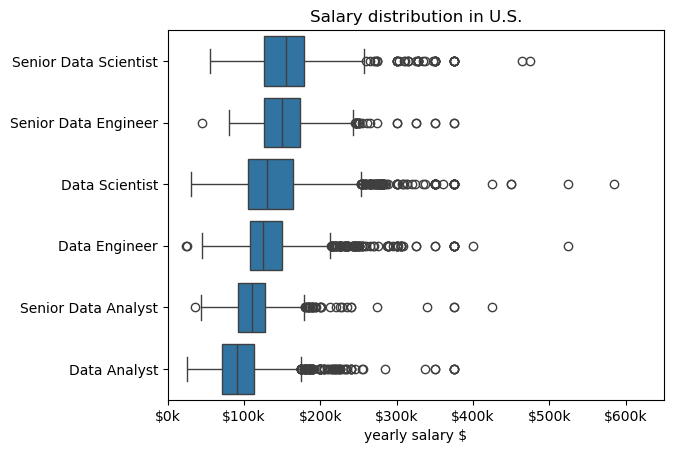

In [5]:
salary_list = [df_us_top6[df_us_top6['job_title_short'] == jt]['salary_year_avg'] for jt in job_titles]

#plt.boxplot(job_list, labels = job_title, vert = False)

sns.boxplot(data = df_us_top6 , x= 'salary_year_avg', y='job_title_short', order= job_order)
plt.title('Salary distribution in U.S.')
plt.xlabel('yearly salary $')
plt.ylabel('')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x ,__ : f'${int(x/1000)}k'))
plt.xlim(0,650000)
plt.show()

## Investigating Median Salary VS Skill for Data Analyst

Filters the original dataset to only get rows where the job title is 'Data Analyst' and the country is 'United States', to create a new DataFrame df_DA_US. Drop NaN values from the 'salary_year_avg' column. Then it uses the explode method on the job_skills column to create a new row in the DataFrame for each skill associated with a job. Finally, it displays the first five entries of the salary_year_avg and job_skills columns.


In [6]:
df_us_da = df_us[(df_us['job_title_short'] == 'Data Analyst') & (df_us['job_country'] == 'United States')].copy()
df_us_da.dropna(subset='salary_year_avg', inplace=True)
df_us_da = df_us_da.explode('job_skills')
df_us_da[['job_skills','salary_year_avg']].head(5)

,job_skills,salary_year_avg
109,python,89000.0
109,r,89000.0
109,alteryx,89000.0
109,tableau,89000.0
180,excel,90250.0


## Determine The Highest Paid Skills


In [7]:
df_us_top_pay_skill = df_us_da.groupby('job_skills').agg(
    count_of_skill = ('job_skills', 'count'),
    median_sal = ('salary_year_avg','median')           #----------> top pay based on median salary
).sort_values(by='median_sal', ascending= False)

df_us_top_pay_skill = df_us_top_pay_skill.head(10)
df_us_top_pay_skill

,count_of_skill,median_sal
job_skills,,
dplyr,2,196250.0
bitbucket,3,189000.0
gitlab,3,186000.0
solidity,1,179000.0
hugging face,1,175000.0
couchbase,1,160515.0
ansible,1,159640.0
mxnet,2,149000.0
cassandra,6,148250.0


## Determine Most Demanded Skills

In [8]:
df_us_top_skill = df_us_da.groupby('job_skills').agg(
    count_of_skill = ('job_skills', 'count'),       #----------> top pay based on skill popularity
    median_sal = ('salary_year_avg','median')       
).sort_values(by='count_of_skill', ascending= False)

df_us_top_skill = df_us_top_skill.head(10)
df_us_top_skill = df_us_top_skill.sort_values(by='median_sal', ascending= False)
df_us_top_skill

,count_of_skill,median_sal
job_skills,,
python,1431,97500.00
tableau,1364,92875.00
r,893,92500.00
sql server,286,92500.00
sql,2508,91000.00
sas,926,90000.00
power bi,838,90000.00
powerpoint,462,85000.00
excel,1808,84392.00


Creates two horizontal bar charts:

1. Displays the highest paid skills
2. Shows the most in demand skills

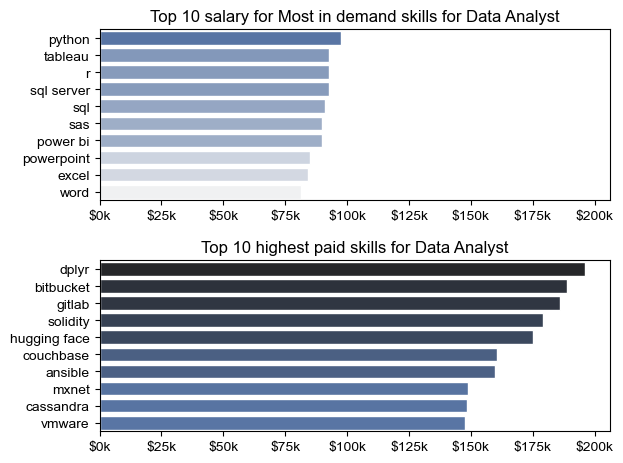

In [9]:
fig , ax = plt.subplots(2,1)

sns.set_theme(style='ticks')

sns.barplot(data=df_us_top_pay_skill, x= 'median_sal', y=df_us_top_pay_skill.index, ax = ax[1], hue = 'median_sal', palette='dark:b_r')
ax[1].set_title('Top 10 highest paid skills for Data Analyst')
ax[1].set_xlabel('')
ax[1].set_ylabel('')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x ,__ : f'${int(x/1000)}k'))
ax[1].legend().remove()


sns.barplot(data=df_us_top_skill, x= 'median_sal', y=df_us_top_skill.index, ax = ax[0], hue = 'median_sal', palette='light:b')
ax[0].set_xlim(ax[1].get_xlim())
ax[0].set_title('Top 10 salary for Most in demand skills for Data Analyst')
ax[0].set_xlabel('')
ax[0].set_ylabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x ,__ : f'${int(x/1000)}k'))
ax[0].legend().remove()


fig.tight_layout()
plt.show()